# 🍔👁 Food Vision 101

A tensorflow model that uses the food101 dataset in tensorflow in order to recognize 101 different types of food.

|  | 🍔👁 Food Vision Big™ |
|-----|-----|
| Dataset source | TensorFlow Datasets |
| Train data | 75,750 images |
| Test data | 25,250 images |
| Mixed precision | Yes |
| Fine Tuning | Yes |
| Data loading | Performanant tf.data API | 

## Steps for building the model

* Dowloading the food101 dataset and explore data
* Exploring the Data
* Batching & preparing datasets for modelling (**making our datasets run fast**)
* Creating modelling callbacks
* Setting up **mixed precision training**
* Building a feature extraction model
* Fine-tuning the feature extraction model

## Dowloading the food 101 dataset and explore data

In [3]:
import tensorflow as tf
import tf_keras as keras
import random
import shutil
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import create_tensorboard_callback,make_confusion_matrix,preprocess_img,autolabel

### Dowloading the food 101 dataset using Tensordlow Datasets

In [ ]:
import tensorflow_datasets as tfds

(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"], 
                                             shuffle_files=True, 
                                             as_supervised=True, 
                                             with_info=True) 


train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

train_dir = "path-to-your-training-set"
test_dir = "path-to-your-testing-set"

### Dowloading the food 101 dataset from chrome and loading it

Link to dowload the dataset : https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

#### Extracting the downloaded dataset and organizing it into a train and test folders

* The **train** directory contains 101 folder, each containing 750 photos

* The **test** directory contains 101 folder, each containing 250 photos

In [ ]:
import tarfile

tar_path = r"path-to-your-downloaded-dataset\food-101.tar.gz"
extract_path = r"path-to-the-extraction-location\food-101"

with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)
    
test_file_path  = os.path.join(extract_path,"food-101\meta\test.txt")

with open(test_file_path, 'r') as file:
    test_images = file.read().splitlines()
    
base_dir = os.path.join(extract_path,"food-101")
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

for line in test_images:
    class_name = line.split('/')[0]
    class_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

original_dataset_dir = os.path.join(extract_path,"food-101\food-101\images")

for image_path in test_images:
    class_name, image_name = image_path.split('/')
    src = os.path.join(original_dataset_dir, image_path + '.jpg')
    dst = os.path.join(test_dir, class_name, image_name + '.jpg')
    shutil.move(src, dst)
    
target_dir = os.path.join(extract_path,"food-101\food-101\train")
os.makedirs(target_dir, exist_ok=True)

for item_name in os.listdir(original_dataset_dir):
    item_path = os.path.join(original_dataset_dir, item_name)
    
    if os.path.isdir(item_path):
        dest_path = os.path.join(target_dir, item_name)
        
        shutil.move(item_path, dest_path)

if os.listdir(original_dataset_dir) == []:
    os.rmdir(original_dataset_dir)
    print(f"Deleted empty directory: {original_dataset_dir}")
else:
    print(f"Directory is not empty: {original_dataset_dir}")

train_dir = os.path.join(extract_path,"food-101\train")
test_dir = os.path.join(extract_path,"food-101\test")

train_data = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  
    batch_size=32,          
    shuffle=True
)

test_data = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  
    batch_size=32,          
    shuffle=False
)

In [5]:
train_dir = r'C:\Users\ali-k\OneDrive\Documents\Machine Learning\TensorFlow for Deep Learning\food-101\food-101\train'
test_dir = r'C:\Users\ali-k\OneDrive\Documents\Machine Learning\TensorFlow for Deep Learning\food-101\food-101\test'

train_data = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  
    batch_size=32,          
    shuffle=True
)

test_data = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  
    batch_size=32,          
    shuffle=False
)

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Exploring the Data

In [6]:
class_names = train_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

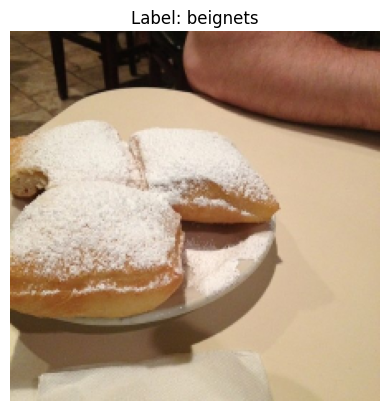

In [7]:
train_one_sample = train_data.take(1)

train_one_sample_iter = train_one_sample.as_numpy_iterator()

image_batch, label_batch = next(train_one_sample_iter)

index = random.randint(0, 32)

image = image_batch[index]
label = label_batch[index]
plt.imshow(image/255)
plt.title(f"Label: {class_names[label]}")
plt.axis(False) 
plt.show()

## Building feature extraction model

#### Creating a checkpoint to the model
>This way, if something goes wrong we can always go back to the model saved in the checkpoint

In [ ]:
checkpoint_path = "model_checkpoints/cp.ckpt"

model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                   monitor = "val_accuracy",
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   verbose=0)

#### Creating the model and compiling it

In [9]:
input_shape = (224,224,3)
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = keras.layers.Input(shape=input_shape,name = "input_layer")

x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = keras.layers.Dense(len(class_names))(x)

outputs = keras.layers.Activation("softmax", dtype=tf.float32,name = "softmax_float32")(x)
model = keras.Model(inputs,outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

history_101_food_classes_feature_extract = model.fit(train_data, 
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

## Preparing or model for fine tuning

In [ ]:
for layer in model.layers:
    model.trainable = True
    print(layer.name,layer.trainable)

#### 1 - Creating a checkpoint to the model
>This way, if something goes wrong we can always go back to the model saved in the checkpoint

In [ ]:
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                   monitor="val_loss",
                                                   save_best_only=True)

#### 2 - Creating an early stopping option
>Automatically stops training when the specified metric (in this case the `val_loss`) stops improving after a specified number of epochs

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",
                                               patience=3)

#### 3 - Creating a way to monitor Learning Rate
>Monitors the learning rate and decrease it automatically when necessary

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, 
                                                 patience=2,
                                                 verbose=1, 
                                                 min_lr=1e-7)

## Compiling and fine tuning our model

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = keras.optimizers.Adam(1e-4),
                metrics = ["accuracy"])

In [ ]:
model.fit(train_data,
            epochs=100,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=int(0.15 * len(test_data)), 
            callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), 
                        model_checkpoint,
                        early_stopping, 
                        reduce_lr])

## Making Predictions

In [ ]:
plt.figure(figsize=(17,10))
for i in range(9):
    class_name = random.choice(class_names)
    filepath = test_dir + "/" + class_name + "/" + random.choice(os.listdir(test_dir + "/" + class_name))
    img = tf.io.read_file(filepath)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,[224,224])
    pred = model.predict(tf.expand_dims(img, axis=0))
    predicted_class = class_names[pred.argmax()]
    plt.subplot(3,3,i+1)
    plt.imshow(img/255)
    if class_name == predicted_class:
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"actual: {class_name},\n prediction: {predicted_class},\n prob: {pred.max():.2f}", c=title_color)
    plt.axis(False);

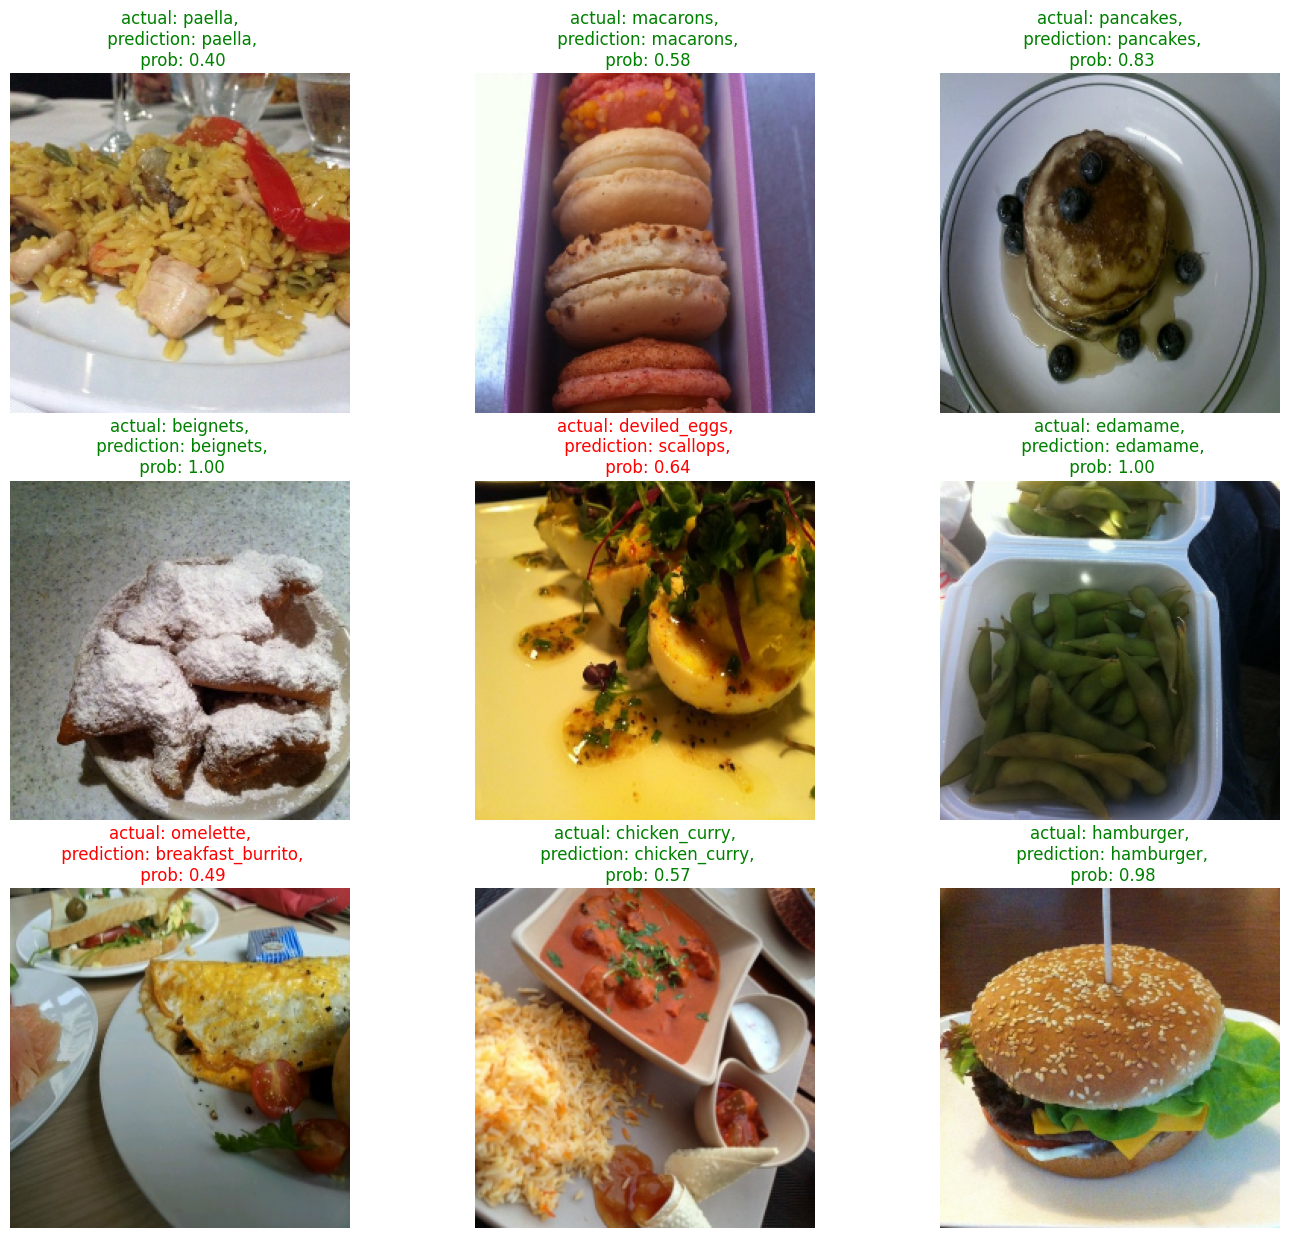

## Evaluating our model

In [ ]:
preds_prob = model.predict(test_data,verbose=1)

#Checking which class was predicted for each photo in the test dataset
pred_classes = preds_prob.argmax(axis=1)

In [ ]:
y_labels = []
for images, labels in test_data:
    y_labels.extend(labels.numpy())

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.46      0.50       250
           1       0.82      0.68      0.74       250
           2       0.76      0.79      0.77       250
           3       0.69      0.80      0.74       250
           4       0.55      0.63      0.59       250
           5       0.51      0.67      0.58       250
           6       0.73      0.85      0.78       250
           7       0.83      0.89      0.86       250
           8       0.61      0.41      0.49       250
           9       0.72      0.60      0.66       250
          10       0.78      0.49      0.60       250
          11       0.62      0.83      0.71       250
          12       0.70      0.80      0.75       250
          13       0.74      0.68      0.71       250
          14       0.79      0.69      0.74       250
          15       0.60      0.55      0.58       250
          16       0.74      0.69      0.71       250
          17       0.61      0.52      0.56       250
          18       0.75      0.54      0.63       250
          19       0.75      0.77      0.76       250
          20       0.75      0.88      0.81       250
          21       0.67      0.67      0.67       250
          22       0.58      0.50      0.54       250
          23       0.91      0.77      0.83       250
          24       0.79      0.86      0.82       250
          25       0.72      0.85      0.78       250
          26       0.65      0.52      0.58       250
          27       0.83      0.86      0.85       250
          28       0.77      0.81      0.79       250
          29       0.77      0.86      0.82       250
          30       0.80      0.82      0.81       250
          31       0.77      0.79      0.78       250
          32       0.90      0.87      0.89       250
          33       0.98      0.98      0.98       250
          34       0.90      0.80      0.85       250
          35       0.86      0.79      0.82       250
          36       0.66      0.64      0.65       250
          37       0.57      0.55      0.56       250
          38       0.85      0.72      0.78       250
          39       0.58      0.44      0.50       250
          40       0.72      0.92      0.81       250
          41       0.70      0.80      0.75       250
          42       0.50      0.79      0.61       250
          43       0.76      0.74      0.75       250
          44       0.72      0.80      0.76       250
          45       0.89      0.85      0.87       250
          46       0.74      0.69      0.72       250
          47       0.64      0.65      0.65       250
          48       0.80      0.66      0.72       250
          49       0.59      0.55      0.57       250
          50       0.63      0.56      0.59       250
          51       0.90      0.83      0.86       250
          52       0.69      0.77      0.73       250
          53       0.79      0.80      0.80       250
          54       0.92      0.91      0.91       250
          55       0.84      0.85      0.85       250
          56       0.64      0.46      0.53       250
          57       0.66      0.56      0.61       250
          58       0.67      0.73      0.70       250
          59       0.63      0.66      0.65       250
          60       0.70      0.85      0.77       250
          61       0.72      0.83      0.77       250
          62       0.78      0.66      0.72       250
          63       0.96      0.93      0.95       250
          64       0.96      0.82      0.89       250
          65       0.94      0.82      0.88       250
          66       0.67      0.66      0.66       250
          67       0.59      0.57      0.58       250
          68       0.84      0.88      0.86       250
          69       0.87      0.91      0.89       250
          70       0.73      0.89      0.81       250
          71       0.82      0.77      0.79       250
          72       0.77      0.75      0.76       250
          73       0.72      0.60      0.65       250
          74       0.77      0.77      0.77       250
          75       0.92      0.88      0.90       250
          76       0.82      0.89      0.86       250
          77       0.51      0.47      0.49       250
          78       0.83      0.78      0.81       250
          79       0.72      0.76      0.74       250
          80       0.74      0.68      0.71       250
          81       0.68      0.89      0.77       250
          82       0.64      0.35      0.45       250
          83       0.75      0.84      0.79       250
          84       0.79      0.52      0.63       250
          85       0.73      0.71      0.72       250
          86       0.81      0.90      0.85       250
          87       0.43      0.64      0.51       250
          88       0.84      0.86      0.85       250
          89       0.60      0.63      0.62       250
          90       0.77      0.88      0.82       250
          91       0.89      0.92      0.91       250
          92       0.82      0.70      0.76       250
          93       0.52      0.39      0.45       250
          94       0.63      0.80      0.71       250
          95       0.80      0.73      0.76       250
          96       0.63      0.63      0.63       250
          97       0.75      0.80      0.77       250
          98       0.68      0.70      0.69       250
          99       0.44      0.66      0.53       250
         100       0.81      0.81      0.81       250

      accuracy                            0.73     25250
      macro avg       0.73      0.73      0.73     25250
      weighted avg    0.73      0.73      0.73     25250



In [ ]:
report = classification_report(y_labels, pred_classes,output_dict=True)
class_f1_scores = {}
for k,v in report.items():
    if k == "accuracy":
        break
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
f1_scores = pd.DataFrame({"class_name":list(class_f1_scores.keys()),
                          "f1-score":list(class_f1_scores.values())}).sort_values("f1-score", ascending=True)

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 101 Different Classes")

autolabel(scores,ax);

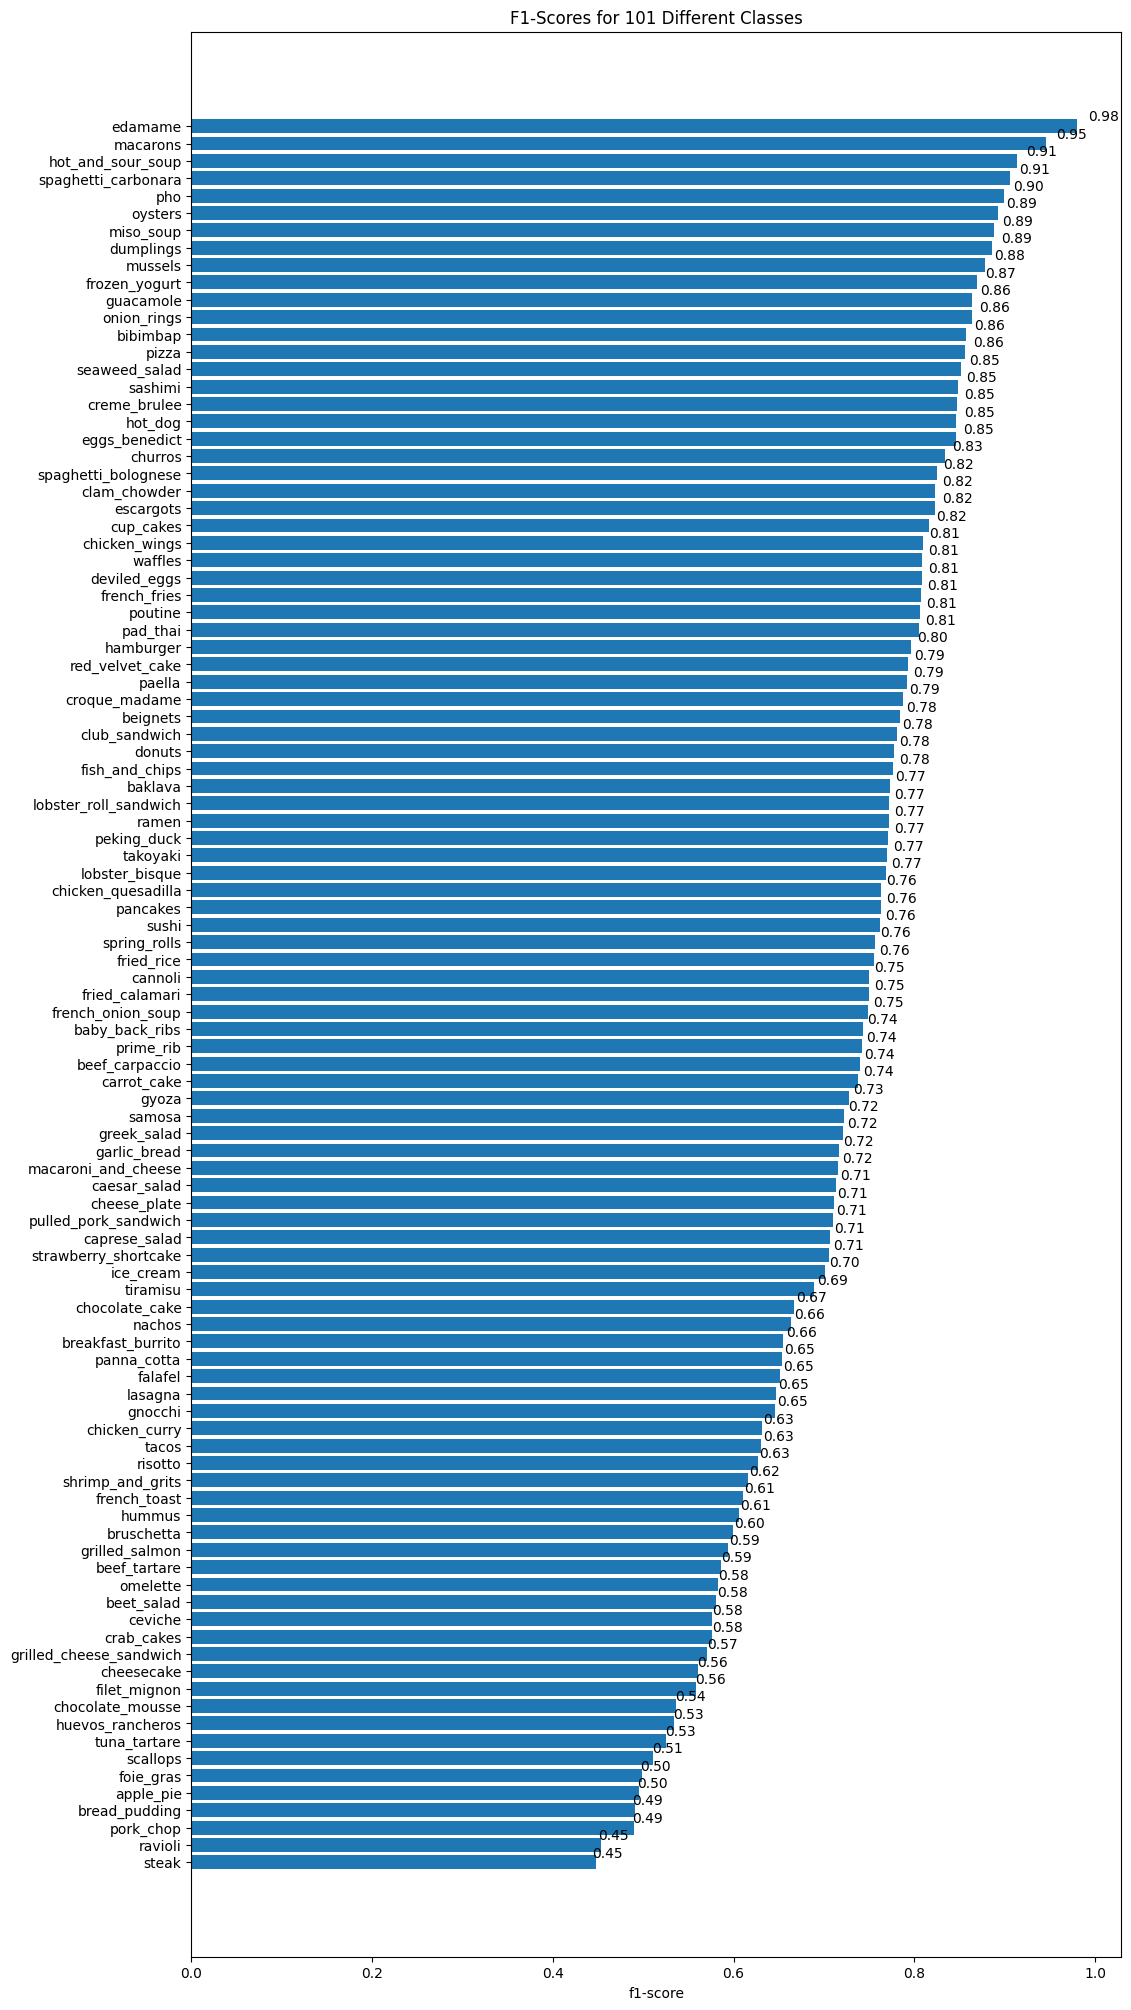